In [38]:
# from google.colab import drive

# drive.mount('/content/drive')

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from pymystem3 import Mystem
m = Mystem()

import warnings
warnings.filterwarnings('ignore')

## Знакомство с данными

In [40]:
# напишем общую функцию для распаковки данных

def open_data(data):
  display(data.head())
  print('------------------------')
  print('Общая информация')
  data.info()
  print('------------------------')
  print('Описание данных')
  display(data.describe())
  print('------------------------')
  print('Количество дубликатов')
  print(data.duplicated().sum())
  print('------------------------')
  print('Количество пропусков')
  display(data.isna().sum())

In [41]:
data_bank = pd.read_csv('/datasets/data.csv')

In [42]:
#data_bank = pd.read_csv('/content/drive/My Drive/Collab file/bank_project2.csv')
open_data(data_bank)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
------------------------
Описание данных


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


------------------------
Количество дубликатов
54
------------------------
Количество пропусков


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Краткий план предобработки:** 

- Работа с пропусками, столбцы ***days_employed*** и ***total_income***: посмотреть, что можно восстановить/заменить, а что придется удалить.
- Обратить внимание на дубликаты и проверить, есть ли пустые значения.
- Проанализировать отрицательные значения в столбце ***days_employed***. 
- Значения в столбце ***education*** имеют разный регистр, привести к строчному виду.

## Шаг 2. Предобработка данных

### Обработка пропусков и дубликатов

**Комментарий:** так как в столбцах ***days_employed*** и ***total_income*** несущественное количество пропущенных значений, а логически заменить их на что-то нельзя (средние значения, например, ставить довольно опасно), то можно заполнить их нулями.

In [43]:
data_bank['days_employed'] = data_bank['days_employed'].fillna(0)
data_bank['total_income'] = data_bank['total_income'].fillna(0)
data_bank.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [44]:
data_bank['days_employed'].describe()

count     21525.000000
mean      56678.874622
std      134870.763085
min      -18388.949901
25%       -2518.168900
50%        -982.531720
75%           0.000000
max      401755.400475
Name: days_employed, dtype: float64

**Комментарий:**
<br> Так как тип данных в столбце ***days_employed*** не целочисленный, то лучше его округлить и привести к целочисленному типу данных. Также, на мой взгляд, будет целесообразным отрицательные значения привести к положительным.

In [45]:
data_bank['days_employed'] = data_bank['days_employed'].apply(np.ceil).abs()

In [46]:
data_bank['days_employed'].describe()

count     21525.000000
mean      60156.130174
std      133356.272035
min           0.000000
25%         610.000000
50%        1808.000000
75%        4779.000000
max      401756.000000
Name: days_employed, dtype: float64

**Комментарий:**
<br> Значения выглядят аномально. В описании данных было указано, что данные в этом столбце представлены в днях. В году в среднем 247 рабочих дней, самому старшему заемщику в наших данных нет и 80 лет. Похоже, что данные все-таки указаны в часах. Посмотрим на распределение данных.

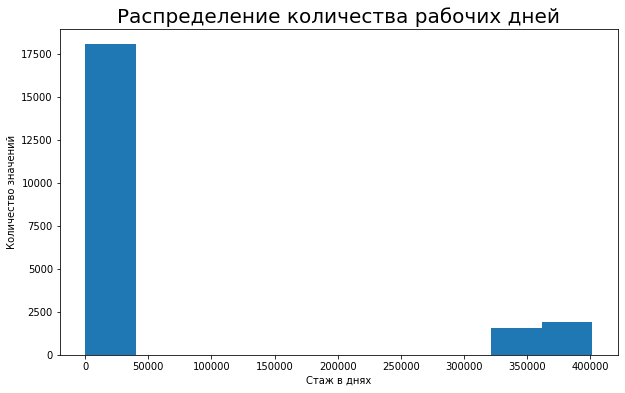

In [47]:
plt.figure(figsize=(10, 6))

bins = np.linspace(-10, 10, 100)

plt.title(label='Распределение количества рабочих дней', fontsize=20)
plt.ylabel('Количество значений')
plt.xlabel('Стаж в днях')

plt.hist(data_bank['days_employed'])
pyplot.show()

**Комментарий:**
<br> Так как в целом аномально больших значений много, то делаю предположение, что данные все-таки указаны в часах, поэтому поделим все значения на 24.

In [48]:
data_bank['days_employed'] = data_bank['days_employed'] / 24

In [49]:
data_bank['days_employed'].describe()

count    21525.000000
mean      2506.505424
std       5556.511335
min          0.000000
25%         25.416667
50%         75.333333
75%        199.125000
max      16739.833333
Name: days_employed, dtype: float64

In [50]:
data_bank['days_employed'] = data_bank['days_employed'].astype('int')

In [51]:
# посмотрим на уникальные значения в столбцах

for column in data_bank.columns:
    print(column)
    print((data_bank[column].unique()))
    print('-----------------------------------')


children
[ 1  0  3  2 -1  4 20  5]
-----------------------------------
days_employed
[  351   167   234 ... 16361 15217 14330]
-----------------------------------
dob_years
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
-----------------------------------
education
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
-----------------------------------
education_id
[0 1 2 3 4]
-----------------------------------
family_status
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
-----------------------------------
family_status_id
[0 1 2 3 4]
-----------------------------------
gender
['F' 'M' 'XNA']
-----------------------------------
income_type
['сотрудник'

**Комментарий:** 

- Столбец ***children*** содержит значения -1 и 20, значение -1 преобразуем в 1, значение 20 похоже на опечатку, исправим на 2.
- Столбец ***days_employed*** содержит отрицательные значения, также считаю необходимым сравнить его со столбцом с возрастом заемщиков.
- Столбец ***dob_years*** содержит значение 0, т.к. это, очевидно, является ошибкой, удалим это значение.
- Столбец ***education***, как упоминали выше, содержит значения разного регистра, приведем их к строчному виду.
- Столбец ***gender*** содержит значение XNA - удалим его.
- В столбце ***family_status*** приведем все к нижнему регистру.
- Столбец ***purpose*** содержит значения одинаковые по смыслу. Проведем лемматизацию и соберем все в категории.

<br> Также хочу уточнить, что значения в столбце ***debt*** будем считывать следующим образом:
- 0 - это нет задолженности.
- 1 - это есть задолженность. 

In [52]:
data_bank.loc[data_bank['children'] == 20, 'children'] = 2
data_bank.loc[data_bank['children'] == -1, 'children'] = 1
data_bank['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [53]:
data_bank = data_bank.query('dob_years > 0')
data_bank['dob_years'].describe()

count    21424.000000
mean        43.497479
std         12.246934
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [54]:
data_bank['education'] = data_bank['education'].str.lower()
data_bank['education'].value_counts()

среднее                15169
высшее                  5225
неоконченное высшее      742
начальное                282
ученая степень             6
Name: education, dtype: int64

In [55]:
data_bank = data_bank[data_bank.gender != 'XNA']

In [56]:
data_bank['family_status'] = data_bank['family_status'].str.lower()
data_bank['family_status'].value_counts()

женат / замужем          12331
гражданский брак          4155
не женат / не замужем     2797
в разводе                 1185
вдовец / вдова             955
Name: family_status, dtype: int64

In [57]:
# удалим дубликаты

data_bank = data_bank.drop_duplicates().reset_index(drop=True)
data_bank.duplicated().sum()

0

### Лемматизация и категоризация данных

Нам необходимо проработать дубликаты в столбце ***purpose*** и привести их к единым значениям. Используем MyStem, так как нам нужно определить основные категории целей.

In [58]:
# сделаем список из уникальных значений 

purpose_list = data_bank['purpose'].unique()
print(purpose_list)

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


In [59]:
purpuse_set = [] #сделаем отдельный список

for word in purpose_list:
    lemma = ''.join(m.lemmatize(word))
    purpuse_set.append(lemma)
    print(purpuse_set)

['покупка жилье\n']
['покупка жилье\n', 'приобретение автомобиль\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n', 'операция с жилье\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n', 'операция с жилье\n', 'образование\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n', 'операция с жилье\n', 'образование\n', 'на проведение свадьба\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n', 'операция с жилье\n', 'образование\n', 'на проведение свадьба\n', 'покупка жилье для семья\n']
['покупка жилье\n', 'приобретение автомобиль\n', 'дополнительный образование\n', 'сыграть свадьба\n', 'операция с жиль

**Категоризация № 1**
<br> Проанализировав получившийся список, нам необходимо выделить основные категории - это будут "*автомобиль*", "*недвижимость*", "*свадьба*", "*образование*" - напишем функцию и заменим их в основной таблице.

In [60]:
def change_category(row):
    l = m.lemmatize(row)
    if 'недвижимость' in l or 'жилье' in l:
        return 'недвижимость'
    if 'свадьба' in l:
        return 'свадьба'
    if 'образование' in l:
        return 'образование'
    if 'автомобиль' in l:
        return 'автомобиль' 

data_bank['purpose_def'] = data_bank['purpose'].apply(change_category) 

data_bank['purpose_def'].value_counts()


недвижимость    10763
автомобиль       4284
образование      3995
свадьба          2310
Name: purpose_def, dtype: int64

**Категоризация № 2** 
- если нет детей - **"нет детей"**. 
- если 1-2 ребенка - **"немногодетная семья"**.
- более 3 детей - **"многодетная семья"**. 

In [61]:
def child_group(children):
    if children == 0:
        return 'нет детей'
    if 1 <= children <= 2:
        return 'немногодетная семья'
    return 'многодетная семья'

data_bank['child_group'] = data_bank['children'].apply(child_group)
data_bank.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def,child_group
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,немногодетная семья
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,немногодетная семья
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,нет детей
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,многодетная семья
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,нет детей
5,0,38,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость,нет детей
6,0,119,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость,нет детей
7,0,6,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование,нет детей
8,2,288,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба,немногодетная семья
9,0,91,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость,нет детей


Теперь сделаем сводную таблицу и посмотрим как распределятся значения по возврату кредита.

In [62]:
table_nul = data_bank.pivot_table('children', index='debt', columns='child_group', aggfunc='count')
display(table_nul)

child_group,многодетная семья,немногодетная семья,нет детей
debt,,,
0,347,6309,12963
1,31,644,1058


Большинство должников не имеют детей, а вот многодетные семьи вообще стараются не брать кредиты. Интересно посмотреть на семейный статус, ведь наличие детей ничего не говорит о том, женат / замужем человек или, например, в разводе и тд. Сначала я хочу посмотреть каким образом распределяется количество детей между разными семейными статусами.


In [63]:
data_bank.pivot_table('debt', index='family_status', columns='child_group', aggfunc='count')

child_group,многодетная семья,немногодетная семья,нет детей
family_status,,,
в разводе,12,396,777
вдовец / вдова,7,105,842
гражданский брак,66,1347,2716
женат / замужем,283,4570,7437
не женат / не замужем,10,535,2249


Интересно, что наибольшее количество людей, которые берут кредиты, состоят в браке, но не имеют детей, а вот меньше всего берут кредиты люди, потерявшие супруга/ супругу и имеющие больше 3 детей, логично. Кажется странным показатель у людей, кто не в браке (и никогда не был), имеющих больше 3 детей - в принципе они могут быть и приемными, либо это ошибка.

Далее я хочу посмотреть распределение внутри групп по задолженностям, снова делаем сводную таблицу.

In [64]:
table_one = data_bank.pivot_table('family_status_id', index=['family_status', 'debt'], columns='child_group', aggfunc='count')
display(table_one)

child_group                 многодетная семья  немногодетная семья  нет детей
family_status         debt                                                   
в разводе             0                  11.0                367.0      722.0
                      1                   1.0                 29.0       55.0
вдовец / вдова        0                   7.0                 95.0      790.0
                      1                   NaN                 10.0       52.0
гражданский брак      0                  58.0               1196.0     2489.0
                      1                   8.0                151.0      227.0
женат / замужем       0                 263.0               4177.0     6923.0
                      1                  20.0                393.0      514.0
не женат / не замужем 0                   8.0                474.0     2039.0
                      1                   2.0                 61.0      210.0

In [65]:
table_one.query('debt == ["1"]')
table_one

child_group                 многодетная семья  немногодетная семья  нет детей
family_status         debt                                                   
в разводе             0                  11.0                367.0      722.0
                      1                   1.0                 29.0       55.0
вдовец / вдова        0                   7.0                 95.0      790.0
                      1                   NaN                 10.0       52.0
гражданский брак      0                  58.0               1196.0     2489.0
                      1                   8.0                151.0      227.0
женат / замужем       0                 263.0               4177.0     6923.0
                      1                  20.0                393.0      514.0
не женат / не замужем 0                   8.0                474.0     2039.0
                      1                   2.0                 61.0      210.0

**Вывод** основной вывод напишу в пункте ответов на вопросы, но уже сейчас можем заметить, что (при значениях 0 - не было задолженностей, 1 - были задолженности) большинство задолженников по кредитам не имеют детей, но находятся в браке, а самый низкий показатель у вдовцов - всегда возвращают кредит в срок.

**Сделаем категоризацию №2**, связанную с уровнем дохода, типом дохода и возвратом кредита в срок. Необходимо сделать разделение по доходам, для этого напишем функцию, которая разделит доход на категории, но сначала нужно посмотреть на границы. 

In [66]:
minimum = data_bank['total_income'].min()
maximum = data_bank['total_income'].max()
print('Минимальный доход составляет:', minimum)
print('Максимальный доход составляет:', maximum)

Минимальный доход составляет: 0.0
Максимальный доход составляет: 2265604.028722744


Теперь для категоризации я хочу определить следующие категории: от 0 до 40 тыс - **ниже среднего**, от 40 до 100 тыс - **средний**, от 100 до 500 тыс - **выше среднего**, от 500 тыс до 1 млн - **высокий**, от 1 млн до максимума - **неприлично высокий**. Для этого сделаем функцию.

In [67]:
def income_group(total_income):
    if 0 <= total_income <= 40000:
        return 'ниже среднего'
    if 41000 <= total_income <= 100000:
        return 'средний доход'
    if 101000 <= total_income <= 500000:
        return 'выше среднего'
    if 501000 <= total_income <= 1000000:
        return 'высокий доход' 
    return 'неприлично высокий доход'

data_bank['income_group'] = data_bank['total_income'].apply(income_group)
data_bank.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def,child_group,income_group
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,немногодетная семья,выше среднего
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,немногодетная семья,выше среднего
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,нет детей,выше среднего
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,многодетная семья,выше среднего
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,нет детей,выше среднего
5,0,38,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость,нет детей,выше среднего
6,0,119,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость,нет детей,выше среднего
7,0,6,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование,нет детей,выше среднего
8,2,288,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба,немногодетная семья,средний доход
9,0,91,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость,нет детей,выше среднего


Теперь посмотрим как распределяются значения между уровнем дохода, типом дохода и задолженностями.

In [68]:
table_two = data_bank.pivot_table('gender', index=['income_group', 'debt'], columns=['income_type'], aggfunc='count')
display(table_two)

income_type                    безработный  в декрете  госслужащий  компаньон  \
income_group             debt                                                   
высокий доход            0             NaN        NaN         14.0       95.0   
                         1             NaN        NaN          NaN        6.0   
выше среднего            0             1.0        NaN        936.0     3552.0   
                         1             NaN        NaN         58.0      289.0   
неприлично высокий доход 0             NaN        NaN         11.0       36.0   
                         1             NaN        NaN          NaN        3.0   
ниже среднего            0             NaN        NaN        142.0      475.0   
                         1             NaN        NaN          8.0       30.0   
средний доход            0             NaN        NaN        262.0      524.0   
                         1             1.0        1.0         20.0       47.0   

income_type                    пенсионер  предприниматель  сотрудник  студент  
income_group             debt                                                  
высокий доход            0          19.0              NaN       57.0      NaN  
                         1           NaN              NaN        6.0      NaN  
выше среднего            0        1983.0              1.0     6810.0      NaN  
                         1         117.0              NaN      725.0      NaN  
неприлично высокий доход 0          35.0              NaN       72.0      NaN  
                         1           2.0              NaN        4.0      NaN  
ниже среднего            0         413.0              1.0     1006.0      NaN  
                         1          40.0              NaN      102.0      NaN  
средний доход            0        1144.0              NaN     2029.0      1.0  
                         1          56.0              NaN      218.0      NaN

Интересно, что безработный может быть с основным доходом "выше среднего". Оставим только задолжников.

In [69]:
table_two.query('debt == ["1"]')

,income_type,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент
income_group,debt,,,,,,,,


**Вывод** Самыми большими должниками оказались сотрудники с заработком выше среднего, а безработные и в декрете при среднем заработке оказались с минимальными значениями, а студенты и вовсе не попали в этот список.

**Сделаем категоризацию №3**, связанную с типом цели и возвратом кредита. В этот пункт я также хочу добавить еще и образование, интересно будет сравнить эти данные. Так как цели у нас уже разбиты на категориям, то сразу перейдем к сводным таблицам.

In [70]:
table_three = data_bank.pivot_table('education_id', index=['purpose_def', 'debt'], columns='education', aggfunc='count')
display(table_three)

education          высшее  начальное  неоконченное высшее  среднее  \
purpose_def  debt                                                    
автомобиль   0      963.0       49.0                137.0   2735.0   
             1       66.0        6.0                 16.0    312.0   
недвижимость 0     2535.0      128.0                344.0   6972.0   
             1      129.0       16.0                 34.0    600.0   
образование  0      871.0       50.0                119.0   2584.0   
             1       55.0        5.0                 12.0    298.0   
свадьба      0      569.0       24.0                 73.0   1460.0   
             1       27.0        4.0                  6.0    147.0   

education          ученая степень  
purpose_def  debt                  
автомобиль   0                NaN  
             1                NaN  
недвижимость 0                5.0  
             1                NaN  
образование  0                1.0  
             1                NaN  
свадьба      0                NaN  
             1                NaN

Самое большое количество кредитов на разные цели берут люди с средним образованием, а вот наименьшее количество у людей с ученой степенью. Кредиты на недвижимость - самые распространенные, а вот на свадьбу люди берут меньше всего кредитов. Оставим данные только по задолженностям.

In [71]:
table_three.query('debt == ["1"]')

,education,высшее,начальное,неоконченное высшее,среднее,ученая степень
purpose_def,debt,,,,,


**Вывод** наибольшее количество задолженников берут кредит на недвижимость, наименьшее количество на свадьбу.

## Шаг 3. Ответьте на вопросы

**Есть ли зависимость между наличием детей и возвратом кредита в срок?**

In [72]:
data_bank.groupby('child_group').debt.agg(['count','mean']).style.format({'mean':'{:.2%}'})

,count,mean
child_group,,
многодетная семья,378,8.20%
немногодетная семья,6953,9.26%
нет детей,14021,7.55%


In [73]:
print(f'Вероятность задолженности в выборке {data_bank.debt.mean():.2%}')

t = data_bank.groupby('child_group').debt.agg(['count','mean'])

t['deviation_all_mean'] = (t['mean'] - data_bank.debt.mean())/data_bank.debt.mean()
t.style.format({'mean':'{:.2%}',
                'deviation_all_mean':'{:.2%}'
               })

Вероятность задолженности в выборке 8.12%


,count,mean,deviation_all_mean
child_group,,,
многодетная семья,378,8.20%,1.04%
немногодетная семья,6953,9.26%,14.12%
нет детей,14021,7.55%,-7.03%


**Комментарий**\
 Мы видим, исходя из количества людей в группах, что люди, которые не имеют детей, самые примерные заемщики, в их случае вероятность невозврата в срок кредита - 7,5%. Гораздо более низкий показатель имеют заемщики с 1-2 детьми - 9,2%. Люди с более, чем 3 детьми немного отстают от немногодетных семей, но находятся практически на одном уровне. Средняя вероятность задолженности по всей группе составляет 8,12%, мы видим, что люди, которые имеют 1-2 детей сильно превышают этот показатель - на 14%.\
 **Вывод**\
  показатель задолженности по всей группе составляет 8%, самое большое отклонение наблюдается в группе с 1-2 детьми, соответственно нужно быть внимательными к группе заемщиков, у которых немногодетные семьи.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [74]:
data_bank.groupby('family_status').debt.agg(['count','mean']).style.format({'mean':'{:.2%}'})

,count,mean
family_status,,
в разводе,1185,7.17%
вдовец / вдова,954,6.50%
гражданский брак,4129,9.35%
женат / замужем,12290,7.54%
не женат / не замужем,2794,9.77%


In [75]:
print(f'Вероятность задолженности в выборке {data_bank.debt.mean():.2%}')

t = data_bank.groupby('family_status').debt.agg(['count','mean'])

t['deviation_all_mean'] = (t['mean'] - data_bank.debt.mean())/data_bank.debt.mean()
t.style.format({'mean':'{:.2%}',
                'deviation_all_mean':'{:.2%}'
               })

Вероятность задолженности в выборке 8.12%


,count,mean,deviation_all_mean
family_status,,,
в разводе,1185,7.17%,-11.62%
вдовец / вдова,954,6.50%,-19.93%
гражданский брак,4129,9.35%,15.18%
женат / замужем,12290,7.54%,-7.07%
не женат / не замужем,2794,9.77%,20.39%


**Комментарий**\
 Люди не состоящие в браке (и даже в официальном) имеют самую высокую вероятность невозврата кредитов - не женатые в 9,7% случаях пропускают сроки, а люди в гражданском браке в 9,3%, хотя их общее количество сильно отличается - почти на тысячу человек. Чаще всего берут кредиты люди, состоящие в браке и среди них 7,5% задолженников (кстати, очень похожий процент вероятности с группой "нет детей"), но выборка достаточно большая. Люди в разводе, или потерявшие супруга берут кредиты редко и процент невозврата колеблется около 7%, количество человек в группах почти одинаковое.\
  **Вывод**\
   Самые большие отклонения от средней вероятности задолженности наблюдаются в группах "не женат" и "гражданский брак", все остальные группы имеют значения меньше общей вероятности, соответственно при выдаче кредита необходимо обратить внимание на то, что человек не имеет постоянно партнера, либо живет в гражданском браке. Исключению подлежат группы разведенных и вдовцов.

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [76]:
data_bank.groupby('income_group').debt.agg(['count','mean']).style.format({'mean':'{:.2%}'})

,count,mean
income_group,,
высокий доход,197,6.09%
выше среднего,14472,8.22%
неприлично высокий доход,163,5.52%
ниже среднего,2217,8.12%
средний доход,4303,7.97%


In [77]:
print(f'Вероятность задолженности в выборке {data_bank.debt.mean():.2%}')

t = data_bank.groupby('income_group').debt.agg(['count','mean'])

t['deviation_all_mean'] = (t['mean'] - data_bank.debt.mean())/data_bank.debt.mean()
t.style.format({'mean':'{:.2%}',
                'deviation_all_mean':'{:.2%}'
               })

Вероятность задолженности в выборке 8.12%


,count,mean,deviation_all_mean
income_group,,,
высокий доход,197,6.09%,-24.95%
выше среднего,14472,8.22%,1.23%
неприлично высокий доход,163,5.52%,-31.97%
ниже среднего,2217,8.12%,0.03%
средний доход,4303,7.97%,-1.79%


**Комментарий**\
 Примерно на одном уровне по возврату кредита находятся группы с заработком от 0 до 500 тыс.рублей (сюда входит три группы - "ниже среднего", "средний" и "выше среднего"). Их процент невозврата составляет примерно 8%, хотя количества в группах довольно сильно отличаются. Группа с доходом "выше среднего" является самой большой из всех. Люди с заработком более 500 тыс. рублей примерно одинаково часто берут кредиты, но вероятность возврата у них  отличается, но колеблетка около 6%.\
  **Вывод**\
    Mожно сделать вывод, что люди с высоким доходом и более чаще всего соблюдают сроки выплат по кредиту. Чаще всего кредиты берут люди с доходом от 101 до 500 тыс.рублей, наверное потому что они более комфортно себя чувствуют при заеме денег, хотя не смотря на это в 8% случаев они задерживают сроки. Также их выборка единственная, кто имеет отклонение от средней вероятности невозврата всех заемщиков. То есть необходимо при выдаче кредита обращать отдельное внимание на людей с заработком выше среднего. Все остальные группы имеют отрицательное отклонение от общей вероятности, хотя выборка "ниже среднего" находится практически на одном уровне со всеми заемщиками, поэтому я бы также обращала отдельное внимание при выдаче кредита и на людей с таким порядком зарплат.

**Как разные цели кредита влияют на его возврат в срок?**

In [78]:
data_bank.groupby('purpose_def').debt.agg(['count','mean']).style.format({'mean':'{:.2%}'})

,count,mean
purpose_def,,
автомобиль,4284,9.34%
недвижимость,10763,7.24%
образование,3995,9.26%
свадьба,2310,7.97%


In [79]:
print(f'Вероятность задолженности в выборке {data_bank.debt.mean():.2%}')

t = data_bank.groupby('purpose_def').debt.agg(['count','mean'])

t['deviation_all_mean'] = (t['mean'] - data_bank.debt.mean())/data_bank.debt.mean()
t.style.format({'mean':'{:.2%}',
                'deviation_all_mean':'{:.2%}'
               })

Вероятность задолженности в выборке 8.12%


,count,mean,deviation_all_mean
purpose_def,,,
автомобиль,4284,9.34%,15.04%
недвижимость,10763,7.24%,-10.82%
образование,3995,9.26%,14.11%
свадьба,2310,7.97%,-1.86%


**Комментарий**\
 Количество кредитов на образование и автомобиль почти одинаковое, как и вероятность задолженности - 9,3%. Больше всего кредитов люди берут на недвижимость и вероятность невозврата кредита в этом случае составляет 7,2%, что для такой большой выборки довольно мало.\
 **Вывод**\
 Если кредит на автомобиль или на образование, то вероятность задолженности будет довольно высокой для обеих групп, на что стоит обратить внимание, также и их отклонение от вероятности задолженности всех заемщиков достаточно высокое. 

## Шаг 4. Общий вывод

Подводя итог, можно выделить следующие выводы:

- Если рассматривать зависимость между количеством детей у заемщика и вероятностью возврата кредита в срок, можно сказать то, что стоит обратить внимание на людей, которые имеют 1-2 детей, их немного (тех, кто берет кредиты), но у них очень большая вероятность невозвратов в срок относительно всех заемщиков. 
- Люди, которые ранее состояли в браке, но на момент взятия кредита не имеют постоянного партнера, либо вдовцы, - самые примерные заемщики. Их немного, но вероятность возврата кредита в их случаях составляет примерно 94%, по сравнению с остальными группами - это хороший результат. 
- Люди, которые имеют постоянного партнера, но у них нет официального брака, либо же они не состоят вообще ни в каких отношениях, берут кредиты также практически в одинаковом количестве (разница примерно в тысячу человек) и вероятность задолженности у них колеблется в районе 9,5%. 
- Другое дело - люди в браке, таких заемщиков много, но процент задолженности в их группе (по сравнению с остальными) - 7,5%, однако этот результат очень похож на результат с категорией "нет детей", поэтому я бы обратила особое внимание, если бы заемщик был в браке, но без детей.
- Интересно, что у людей с доходом от 0 до 500 тыс.рублей вероятность задолженности примерно одинаковая и составляет около 8%, хотя по количеству групп они не находятся на одном уровне. 
- Люди с доходом от 501 тыс.рублей и выше примерно в одинаковом количестве берут кредиты и вероятность задолженности для них составляет примерно 6%, что по сравнению с другими группами кажется небольшим. То есть в принципе можно сделать вывод, что если к вам пришел заемщик с высоким доходом, то он вероятнее всего быстрее погасит кредит и не влезет в задолженности (хотя, на мой взгляд, это на уровне здравого смысла).
- Самые распространенные кредиты - на недвижимость, вероятность задолженности в этой категории составляет 7,2%, что является хорошим результатом по сравнению с остальными категориями.
- Кредиты на автомобиль и образование берут примерно в одинаковом (небольшом) количестве и возвращают их с одинаковой вероятностью - в 91% случаев кредит будет выплачен в срок.

**Из общих наблюдений** 
- Больше всего кредитов берут женщины (более 50%). 
- Средний возраст заемщиков - 43 года. 
- Всего 2 предпринимателя, которые взяли кредит, что довольно странно, так как многие берут кредиты для старта своего бизнеса, хотя такой цели нет ни у одного из заемщиков. 
- Кредиты все-таки чаще всего возвращаются в срок - в 91% случаев. 
- Люди со средним образованием в основном являются заемщиками, люди с ученой степенью кредиты практически не берут.
- Интересно, что много пенсионеров с уровнем дохода "выше среднего" берут кредиты, что вообще, конечно, довольно странно для России с порядками пенсий.
- В каждой группе кредит на недвижимость является самым многочисленным.